In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('dataset.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2021-03-01 to 2024-07-15
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bawang Merah          1185 non-null   float64
 1   Bawang Putih          1185 non-null   float64
 2   Cabai Merah Keriting  1185 non-null   float64
 3   Cabai Rawit Merah     1185 non-null   float64
 4   Daging Sapi           1185 non-null   float64
 5   Daging Ayam           1185 non-null   float64
 6   Telur Ayam            1185 non-null   float64
 7   Beras                 1185 non-null   float64
 8   Minyak Goreng         1185 non-null   float64
dtypes: float64(9)
memory usage: 96.3 KB


In [4]:
df.isna().sum()

Bawang Merah            48
Bawang Putih            48
Cabai Merah Keriting    48
Cabai Rawit Merah       48
Daging Sapi             48
Daging Ayam             48
Telur Ayam              48
Beras                   48
Minyak Goreng           48
dtype: int64

In [19]:
df

,Bawang Merah,Bawang Putih,Cabai Merah Keriting,Cabai Rawit Merah,Daging Sapi,Daging Ayam,Telur Ayam,Beras,Minyak Goreng
Tanggal,,,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-11,30520.0,40430.0,43430.0,46210.0,134870.0,38010.0,27490.0,15160.0,17170.0
2024-07-12,30750.0,39480.0,41030.0,49340.0,134550.0,37620.0,27720.0,15020.0,16850.0
2024-07-13,30680.0,39530.0,39610.0,52780.0,135400.0,37290.0,27720.0,15200.0,16980.0


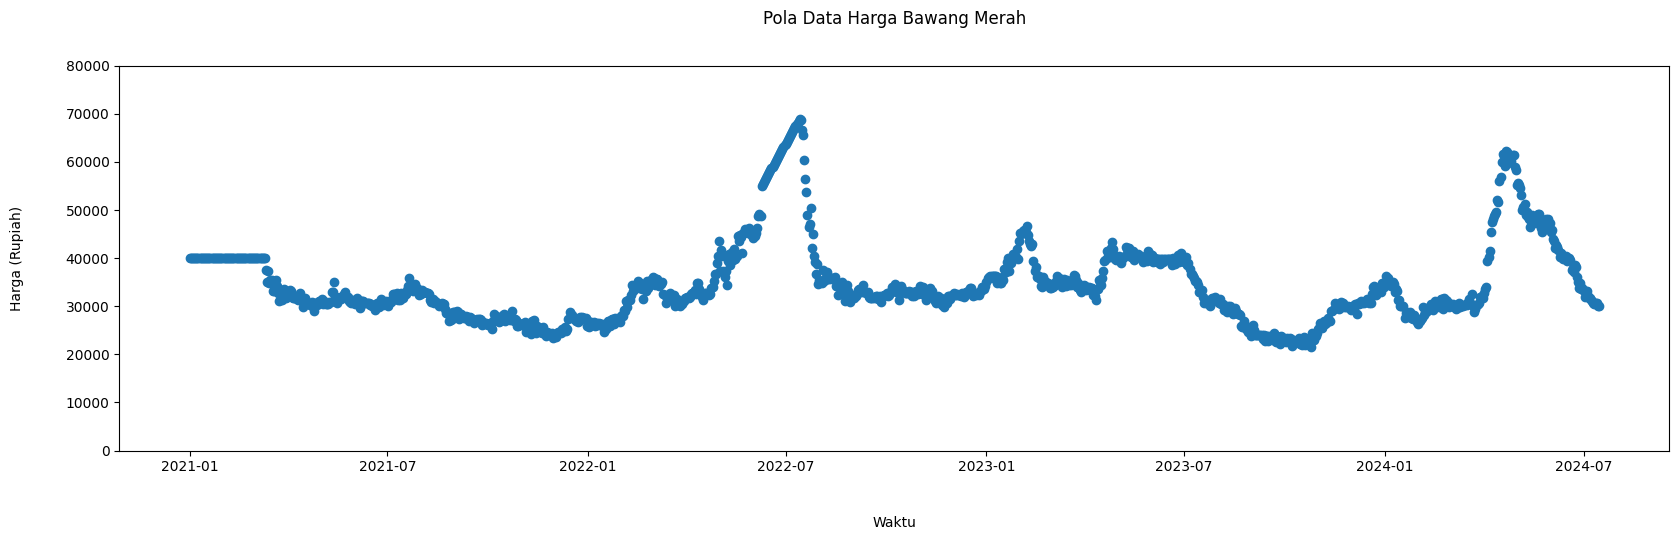

In [182]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Bawang Merah'])
plt.title('Pola Data Harga Bawang Merah', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Bawang Putih'])
plt.title('Pola Data Harga Bawang Putih', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Cabai Merah Keriting'])
plt.title('Pola Data Harga Cabai Merah Keriting', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Cabai Rawit Merah'])
plt.title('Pola Data Harga Cabai Rawit Merah', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Daging Sapi'])
plt.title('Pola Data Harga Daging Sapi', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([100000, 120000, 140000, 160000, 180000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Daging Ayam'])
plt.title('Pola Data Harga Daging Ayam', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([20000, 30000, 40000, 50000, 60000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Telur Ayam'])
plt.title('Pola Data Harga Telur Ayam', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([10000, 15000, 20000, 25000, 30000, 35000, 40000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Beras'])
plt.title('Pola Data Harga Beras', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.scatter(df.index, df['Minyak Goreng'])
plt.title('Pola Data Harga Minyak Goreng', pad=30)
plt.xlabel('Waktu', labelpad=30)
plt.ylabel('Harga (Rupiah)', labelpad=30)
plt.yticks([10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000])
plt.show()

In [ ]:
# # Menghitung batas atas dan bawah untuk setiap fitur

# maximum = {}
# minimum = {}

# def calculateMaxMin(data):
#   for i in range(1, df.shape[1]):
#     Q1 = (data.iloc[:,i]).quantile(0.25)
#     Q3 = (data.iloc[:,i]).quantile(0.75)
#     IQR = Q3 - Q1

#     maximum[data.iloc[:,i].name] = Q3 + (1.5*IQR)
#     minimum[data.iloc[:,i].name] = Q1 - (1.5*IQR)

# calculateMaxMin(df)

In [ ]:
# minimum

{'GKP Tingkat Petani': 2775.0,
 'GKP Tingkat Penggilingan': 2620.0,
 'GKG Tingkat Penggilingan': 3225.0,
 'Beras Premium Penggilingan': 6500.0,
 'Beras Premium Grosir': 8910.0,
 'Beras Premium Eceran': 9110.0}

In [ ]:
# maximum

{'GKP Tingkat Petani': 6335.0,
 'GKP Tingkat Penggilingan': 7180.0,
 'GKG Tingkat Penggilingan': 7665.0,
 'Beras Premium Penggilingan': 13940.0,
 'Beras Premium Grosir': 13230.0,
 'Beras Premium Eceran': 14870.0}

In [ ]:
# def deleteOutliers(data):
#   for i in range(1, df.shape[1]):
#     outliersLowerThan = data.iloc[:,i] < minimum[data.iloc[:,i].name]
#     outliersMoreThan = data.iloc[:,i] > maximum[data.iloc[:,i].name]

#     data.mask(outliersLowerThan, np.nan, inplace=True)
#     data.mask(outliersMoreThan, np.nan, inplace=True)

# deleteOutliers(df)

In [5]:
# Menggunakan metode interpolasi untuk mengganti data bernilai NA

df.interpolate(method='linear', inplace=True, limit_direction='both')

In [6]:
# Melihat jumlah data bernilai kosong setelah metode interpolasi

df.isna().sum()

Bawang Merah            0
Bawang Putih            0
Cabai Merah Keriting    0
Cabai Rawit Merah       0
Daging Sapi             0
Daging Ayam             0
Telur Ayam              0
Beras                   0
Minyak Goreng           0
dtype: int64

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

In [24]:
import pickle

In [33]:
# Simpan scaler ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [24]:
df_scaled

array([[0.39023364, 0.30184805, 0.39807692, ..., 0.26062847, 0.18275862,
        0.0653951 ],
       [0.39023364, 0.30184805, 0.39807692, ..., 0.26062847, 0.18275862,
        0.0653951 ],
       [0.39023364, 0.30184805, 0.39807692, ..., 0.26062847, 0.18275862,
        0.0653951 ],
       ...,
       [0.19406441, 0.77535934, 0.23365385, ..., 0.43253235, 0.73448276,
        0.38147139],
       [0.18101452, 0.72977413, 0.23536325, ..., 0.43484288, 0.68793103,
        0.36058129],
       [0.17912019, 0.79096509, 0.25288462, ..., 0.44362292, 0.68965517,
        0.35059037]])

In [8]:
train_split = round(len(df)*0.80) 
test_split = round(len(df)*0.10)

df_training = df_scaled[:train_split]
df_val = df_scaled[train_split:-test_split]
df_testing = df_scaled[-test_split:]

In [9]:
df_testing.shape

(123, 9)

In [10]:
df_training.shape

(986, 9)

In [69]:
def createXY(data, n_past, n_future):
  dataX = []
  dataY = []
  for i in range(n_past, len(data)):
    dataX.append(data[i - n_past:i])
    dataY.append(data[i,0])
  return np.array(dataX),np.array(dataY)

trainX, trainY=createXY(df_training, 10, 41)
testX, testY=createXY(df_testing, 10, 41)
valX, valY = createXY(df_val, 10, 41)

In [31]:
def createXY(data, n_past):
  dataX = []
  dataY = []
  for i in range(n_past, len(data)):
    dataX.append(data[i - n_past:i,1])
    dataY.append(data[i,1])
  return np.array(dataX),np.array(dataY)

trainX, trainY=createXY(df_training, 30)
testX, testY=createXY(df_testing, 30)
valX, valY = createXY(df_val, 30)

In [32]:
trainX.shape

(956, 30)

In [33]:
def reshapeData(dataX):
  dataX = dataX.reshape((dataX.shape[0], dataX.shape[1], 1))
  return dataX

trainX = reshapeData(trainX)
testX = reshapeData(testX)
valX = reshapeData(valX)

In [34]:
valX.shape

(94, 30, 1)

In [35]:
input_shape = trainX[0].shape
input_shape

(30, 1)

In [16]:
from tensorflow.keras.optimizers import Adam

In [52]:
# Build the LSTM model
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(units=256),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=1),
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.Accuracy()])

# Train the model with train set and validation set
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(valX, valY))
# Predict on the test set
predictions = model.predict(testX)

# Evaluate the model
mse = np.mean((predictions - testY) ** 2)
print("Loss:", mse)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.0000e+00 - loss: 0.0328 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.0000e+00 - loss: 0.0014 - val_accuracy: 0.0000e+00 - val_loss: 0.0011
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0015 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0012 - val_accuracy: 0.0000e+00 - val_loss: 6.9092e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0013 - val_accuracy: 0.0000e+00 - val_loss: 0.0029
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0015 - val_accuracy: 0.0000e+00 - val_loss: 6.8105e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0012 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/s

In [112]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10, 256)           264192    
                                                                 
 dropout_17 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_28 (LSTM)              (None, 10, 256)           525312    
                                                                 
 dropout_18 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_29 (LSTM)              (None, 256)               525312    
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1315073 (5.02 MB)
Trainable params: 131

In [44]:
if __name__ == '__main__':
    model.save("model_1.h5")

c:\laragon\www\final-project\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
valX[0]

array([[0.07998316, 0.5137577 , 0.46047009, 0.53489057, 0.45048286,
        0.24811156, 0.30637708, 0.5637931 , 0.17438692],
       [0.0841928 , 0.60287474, 0.4508547 , 0.51565414, 0.45427002,
        0.21731551, 0.31192237, 0.52586207, 0.17801998],
       [0.10713534, 0.57494867, 0.48044872, 0.58504269, 0.45427002,
        0.23881464, 0.31238447, 0.54827586, 0.17801998],
       [0.08545569, 0.53264887, 0.50032051, 0.60692904, 0.47850786,
        0.21441023, 0.35628466, 0.53793103, 0.16257947],
       [0.10313618, 0.62710472, 0.50277778, 0.61644911, 0.45427002,
        0.22545032, 0.31839187, 0.54827586, 0.19346049],
       [0.11681751, 0.56303901, 0.50737179, 0.39179507, 0.45427002,
        0.23881464, 0.32994455, 0.54827586, 0.18165304],
       [0.10124184, 0.54291581, 0.52777778, 0.56914319, 0.45427002,
        0.22545032, 0.3525878 , 0.54827586, 0.17166213],
       [0.10608293, 0.60287474, 0.54722222, 0.57513004, 0.45427002,
        0.22545032, 0.36414048, 0.55862069, 0.18165304],


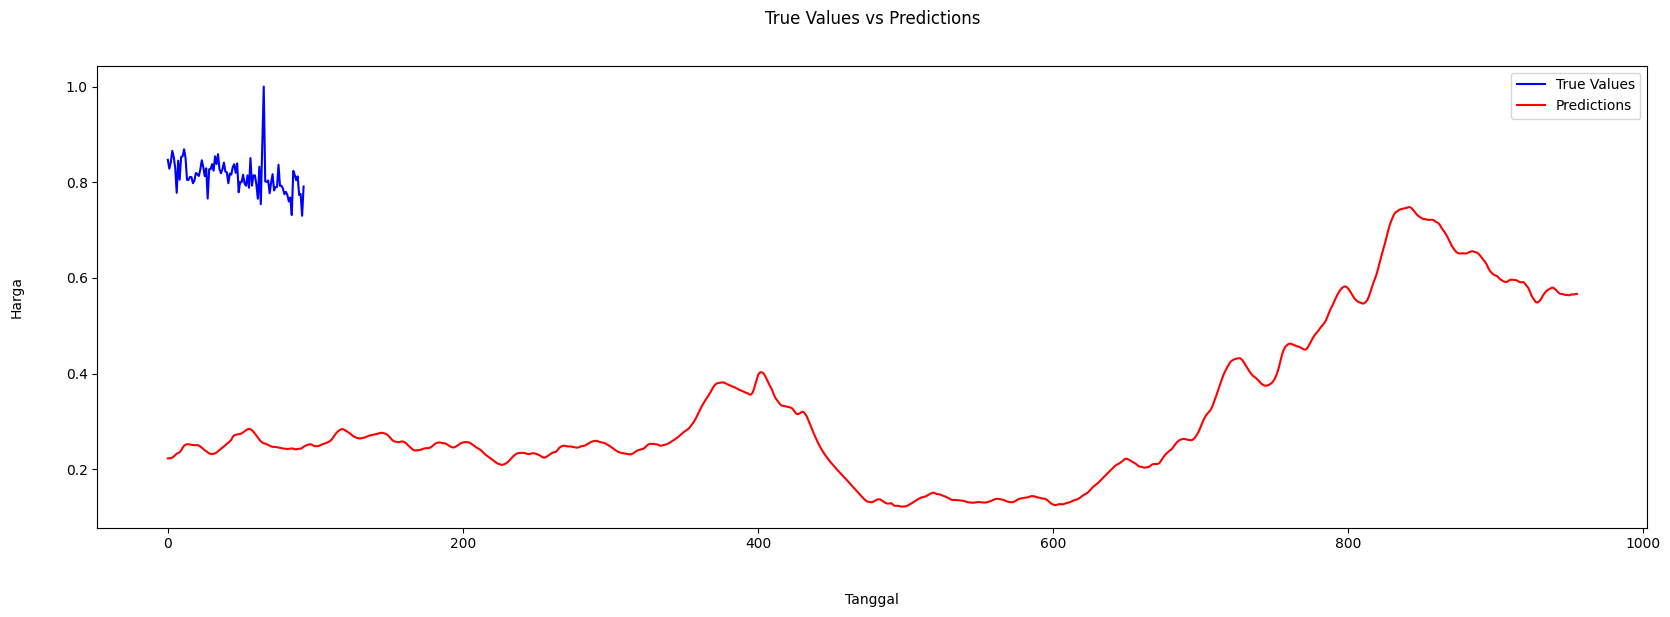

In [38]:
# Plot nilai prediksi dan nilai sebenarnya

plt.figure(figsize=(20, 6))
plt.plot(testY, label='True Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')

plt.xlabel('Tanggal', labelpad=30)
plt.ylabel('Harga', labelpad=30)
plt.title('True Values vs Predictions', pad=30)
plt.legend()

plt.show()

In [217]:
# Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(units=64, activation='relu'))
model_ann.add(Dense(units=32, activation='relu'))  # Hidden layer
model_ann.add(Dense(units=1))  # Output layer

# Compile the ANN model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN model
model_ann.fit(trainX, trainY, epochs=10, batch_size=32)

# Predict on the test set
predictions_ann = model_ann.predict(testX)

# Evaluate the ANN model
mse_ann = np.mean((predictions_ann - testY) ** 2)
print("Loss (ANN):", mse_ann)

Epoch 1/10
39/39 [==============================] - 3s 3ms/step - loss: 0.0416
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0334
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0325
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0318
Epoch 8/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0317
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Loss (ANN): 0.0450018000717063


In [225]:
predictions_inverse = np.zeros((predictions.shape[0], 9))
predictions_inverse[:,0] = predictions[:,0]

In [230]:
predictions_inverse[0]

array([0.21490616, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [232]:
predictions = scaler.inverse_transform(predictions_inverse)

array([ 31670.19147456,  20650.        ,  17740.        ,  23040.        ,
       114630.        ,  32790.        ,  18360.        ,  10940.        ,
        12780.        ])